In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append( 'C:\Machine Learning\mylib' )
sys.path.append( 'L:\ML\mylib' )
import K_means as Km
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df_classif = pd.read_csv('../datasets/csgo_task_pred.csv')
df_classif = df_classif.sample(1000)
df_classif = df_classif.drop(columns=df_classif.iloc[:,:1], axis=1)
y_classif, X_classif=  df_classif["bomb_planted"], df_classif.drop(["bomb_planted"], axis=1)

In [16]:
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_classif, y_classif = ros.fit_resample(X_classif, y_classif)

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pairs = sorted(zip([1,4,3], [[1,2,3],[2,3,4],[4,5,6]]))
print(pairs)
pairs = map(lambda a: a[1], pairs)
print(list(pairs))

[(1, [1, 2, 3]), (3, [4, 5, 6]), (4, [2, 3, 4])]
[[1, 2, 3], [4, 5, 6], [2, 3, 4]]


In [18]:
class PCA:
    def __init__(self, n_classes_after):
        self.n = n_classes_after
    def fit_transform(self, X):
        stsc = StandardScaler()
        X = stsc.fit_transform(X)
        cov_matrix = np.cov(X.T)
        values, vectors = np.linalg.eigh(cov_matrix)
        pairs = sorted(zip(values, vectors))[:self.n]
        pairs = map(lambda a: a[1], pairs)
        principle_data = np.dot(X, np.array(list(pairs)).T)
        return principle_data

In [19]:
p = PCA(2)

In [20]:
new_data = p.fit_transform(X_classif)

In [21]:
print(new_data[1][1])

1.0152195965691597


In [22]:
def check_classif(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
    lr = LogisticRegression(random_state=42, C=0.5, n_jobs=-1).fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred))

In [23]:
new_data.shape

(1806, 2)

In [24]:
md = Km.K_means(2, 1)
md.fit(new_data, 10)
pred = md.predict(new_data)

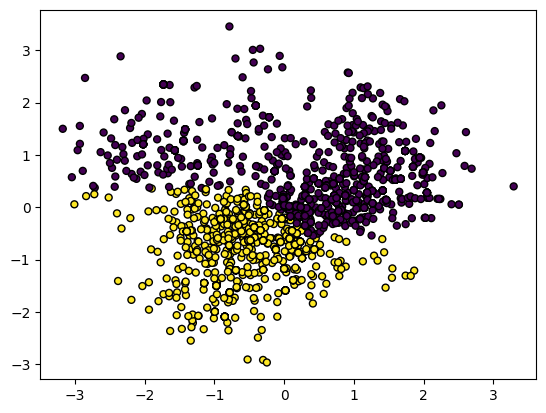

In [25]:
import matplotlib.pyplot as plt
plt.scatter(new_data[:,0], new_data[:,1], marker="o", c=pred, s=25, edgecolor="k")
plt.show()

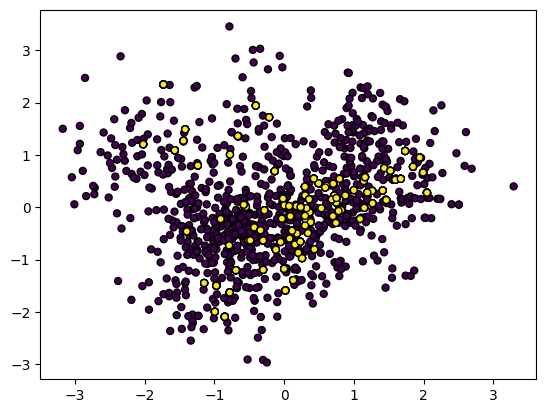

In [26]:
plt.scatter(new_data[:,0], new_data[:,1], marker="o", c=y_classif, s=25, edgecolor="k")
plt.show()